Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

Data Dictionary:

Variable Name	Description
Carat	        Carat weight of the cubic zirconia.
Cut	        Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
Color 	    Colour of the cubic zirconia.With D being the worst and J the best.
Clarity	      
Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

Depth	 The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
Price	 the Price of the cubic zirconia.
X	 Length of the cubic zirconia in mm.
Y	 Width of the cubic zirconia in mm.
Z	 Height of the cubic zirconia in mm.


In [297]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np   
import pandas as pd    
import seaborn as sns

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from scipy.stats import zscore 
from scipy.signal import lfilter 

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [298]:
df= pd.read_csv("C:\\Users\\user\\Desktop\\PG-DSBA\\Python for Data Science\\Predictive Modeling Week3\\Project report\\cubic_zirconia.csv")

In [299]:
df.drop('Unnamed: 0',axis =1, inplace= True)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivar.iate Analysis.

In [301]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [302]:
df.duplicated().sum()

34

In [303]:
df.drop_duplicates(inplace=True)

<Figure size 240x240 with 0 Axes>

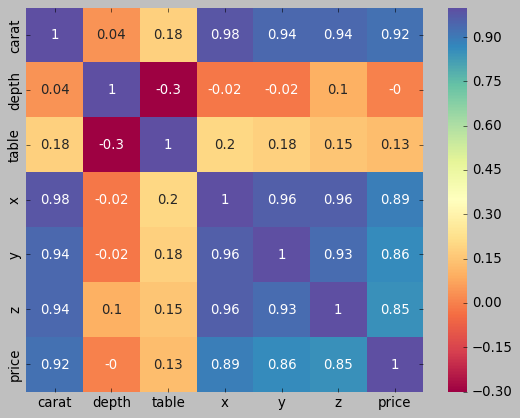

<Figure size 240x240 with 0 Axes>

In [304]:
sns.heatmap(df.corr().round(2), annot= True, cmap = 'Spectral')
plt.figure(figsize= (3,3))

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [305]:
df[df.depth.isnull()]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [306]:
print(df.depth.median())
df.depth.fillna(61.8,inplace= True)

61.8


In [307]:
df[(df['z']> 10) | (df['y']> 20) ]

,carat,cut,color,clarity,depth,table,x,y,z,price
344,0.51,Very Good,E,VS1,61.8,54.7,5.12,5.15,31.80,1970
25795,2.00,Premium,H,SI2,58.9,57.0,8.09,58.90,8.06,12210


In [308]:
df.drop([344,25795],axis= 0,inplace= True)

In [309]:
# we cannot have a " 0 mm " dimension of x ,y, z dimension of a cubic zirconia.
df[(df['z'] < 1) | (df['y'] < 1) | (df['x'] < 1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [310]:
df.drop([5821,6034,10827,12498,12689,17506,18194,23758],axis= 0,inplace= True)

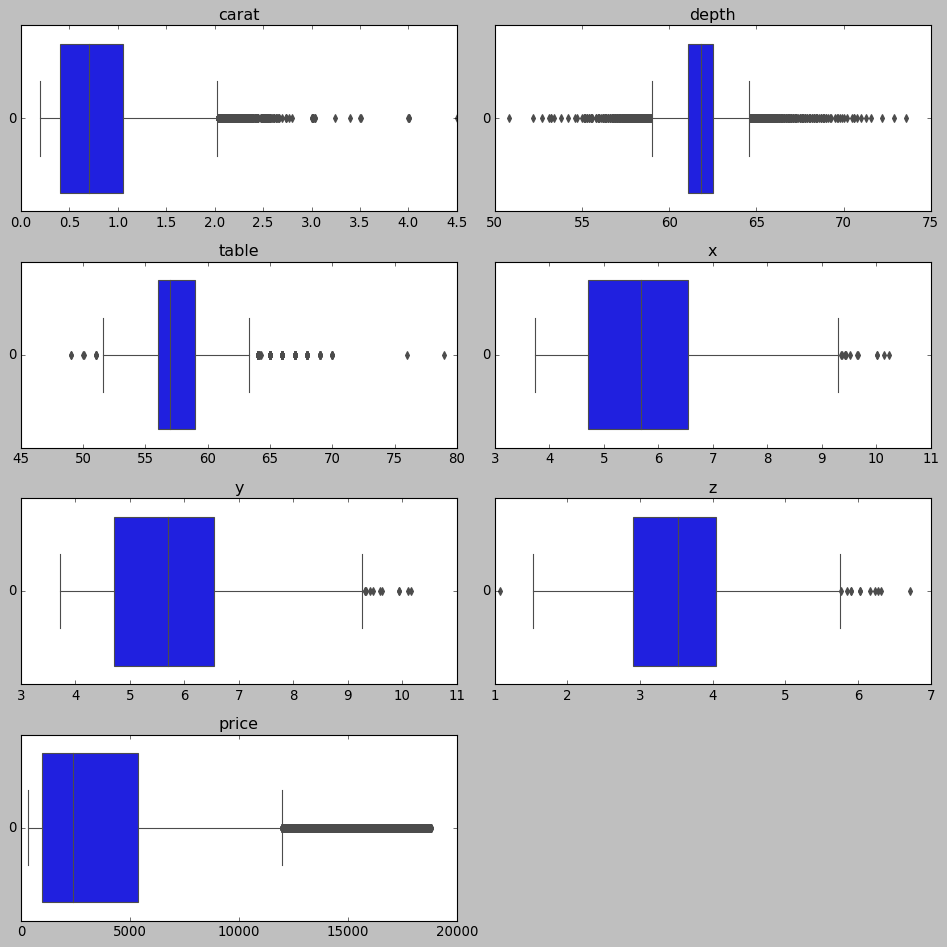

In [311]:
a = 1
plt.figure(figsize= (12,12))
for i in df.columns:
    if df[i].dtypes != 'object':
        plt.subplot(4,2,a)
        sns.boxplot(data=df[i],orient= 'h' )
        a = a + 1
        plt.title(label= i)
        plt.tight_layout()

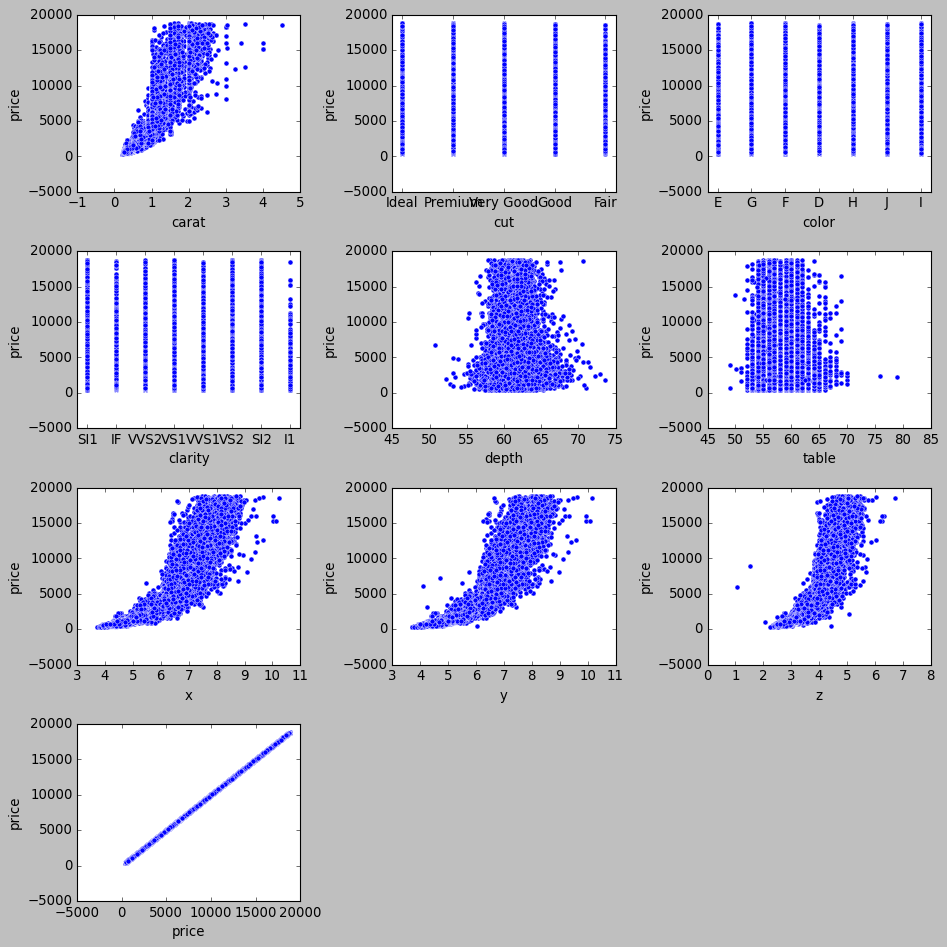

In [312]:
a = 1
plt.figure(figsize = (12,12))
for i in df.columns:
    plt.subplot(4,3,a)
    sns.scatterplot(y='price',x= df[i], data= df)
    a = a + 1
    plt.tight_layout()

In [313]:
df.describe()

,carat,depth,table,x,y,z,price
count,26923.000000,26923.000000,26923.000000,26923.000000,26923.000000,26923.000000,26923.000000
mean,0.797787,61.747086,57.455425,5.729320,5.731199,3.537603,3936.015711
std,0.477043,1.393400,2.231345,1.126025,1.117840,0.695983,4020.798496
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5352.500000
max,4.500000,73.600000,79.000000,10.230000,10.160000,6.720000,18818.000000


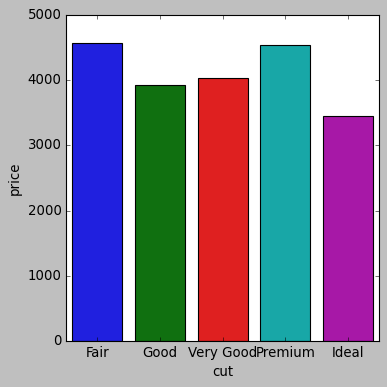

In [314]:
plt.figure(figsize = (5,5))
sns.barplot(x =df.cut, y = df.price, order= ['Fair','Good','Very Good','Premium','Ideal'],ci =0)
plt.tight_layout()

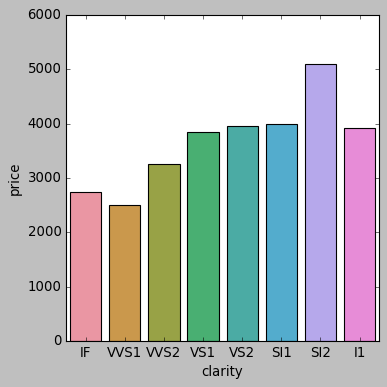

In [315]:
plt.figure(figsize = (5,5))
sns.barplot(x =df.clarity, y = df.price, order= ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],ci =0)
plt.tight_layout()

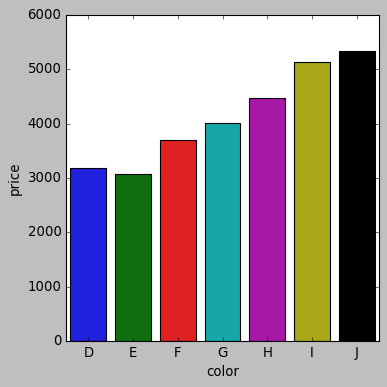

In [316]:
plt.figure(figsize = (5,5))
sns.barplot(x =df.color, y = df['price'], order= ['D','E','F','G','H','I','J'],ci =0)
plt.tight_layout()

In [317]:
df.groupby('color')['price'].median()

color
D    1799.0
E    1698.0
F    2282.0
G    2273.5
H    3394.0
I    3733.0
J    4234.5
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

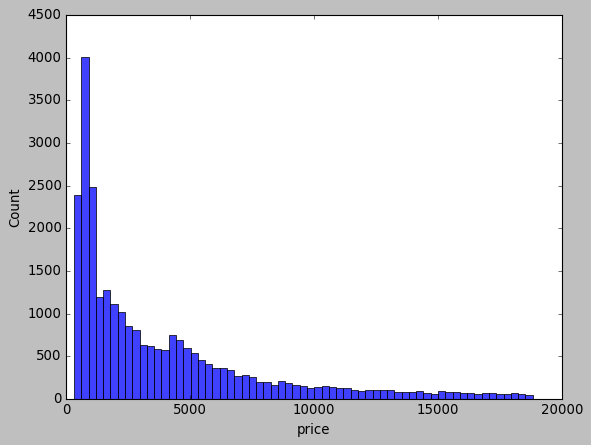

In [318]:
sns.histplot(df['price'])

In [319]:
df.groupby('cut')['price'].max()

cut
Fair         18574
Good         18707
Ideal        18804
Premium      18795
Very Good    18818
Name: price, dtype: int64

In [320]:
df.groupby('cut')['price'].median()

cut
Fair         3337.0
Good         3092.5
Ideal        1762.0
Premium      3108.0
Very Good    2634.5
Name: price, dtype: float64

In [321]:
# Cut increasing quality Fair,good,very good, premium, ideal
# Color increasing order D,E,F,G,H,I,J
# Clarity increasing order IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1

In [322]:
for i in df.columns:
    if df[i].dtypes != 'object':
        q3 = df[i].quantile(0.75)
        q1 = df[i].quantile(0.25)
        iqr = q3 - q1
        uw = q3 + 1.5*iqr
        lw = q1 - 1.5*iqr
        print(i, uw, lw)
        print((df[i] > uw).sum())
        print((df[i] < lw).sum())

carat 2.0250000000000004 -0.5750000000000001
655
0
depth 64.6 59.0
516
894
table 63.5 51.5
309
8
x 9.309999999999999 1.9500000000000002
12
0
y 9.285 1.9649999999999999
11
0
z 5.75 1.1899999999999997
11
1
price 11963.75 -5666.25
1777
0


In [323]:
# Cut increasing quality Fair,good,very good, premium, ideal
# Color increasing order D,E,F,G,H,I,J
# Clarity increasing order IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1

In [324]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print("PRICE MEDIAN", df.groupby([i])['price'].median())

PRICE MEDIAN cut
Fair         3337.0
Good         3092.5
Ideal        1762.0
Premium      3108.0
Very Good    2634.5
Name: price, dtype: float64
PRICE MEDIAN color
D    1799.0
E    1698.0
F    2282.0
G    2273.5
H    3394.0
I    3733.0
J    4234.5
Name: price, dtype: float64
PRICE MEDIAN clarity
I1      3494.0
IF      1063.0
SI1     2795.0
SI2     4077.0
VS1     1949.0
VS2     2066.0
VVS1    1066.0
VVS2    1253.0
Name: price, dtype: float64


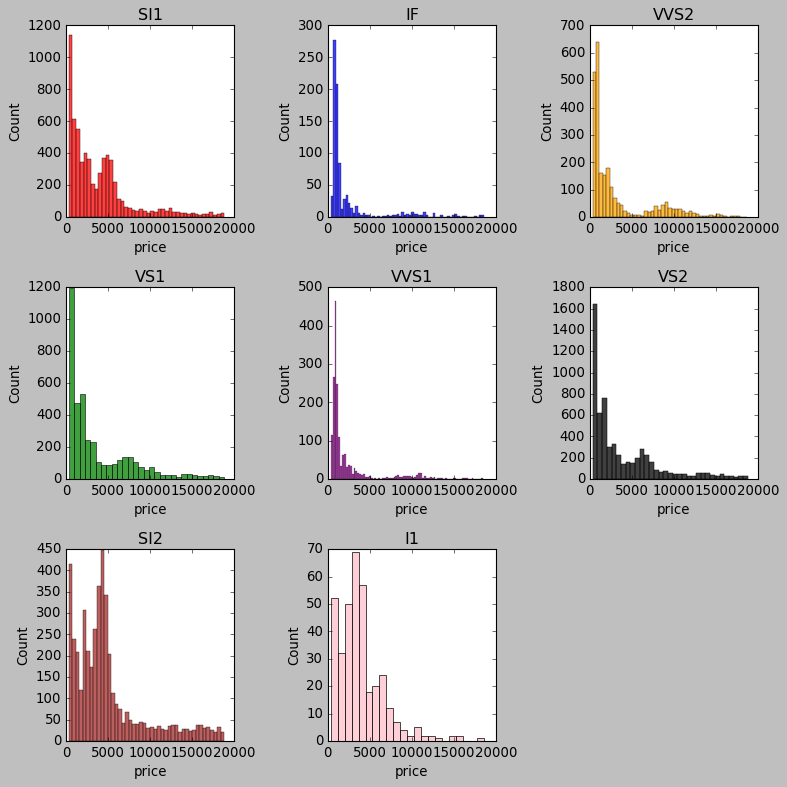

In [325]:
a = 1
plt.figure(figsize= (10,10))
for i in df.clarity.unique():
    plt.subplot(3,3,a)
    b = df[df['clarity'] == i].price
    c = [0,'red','blue','orange','green','purple','black','brown','pink']
    sns.histplot(b, color= c[a])    
    plt.title(i)
    a = a + 1 
    plt.tight_layout()

Text(0.5, 1.0, 'VVS1 & IF')

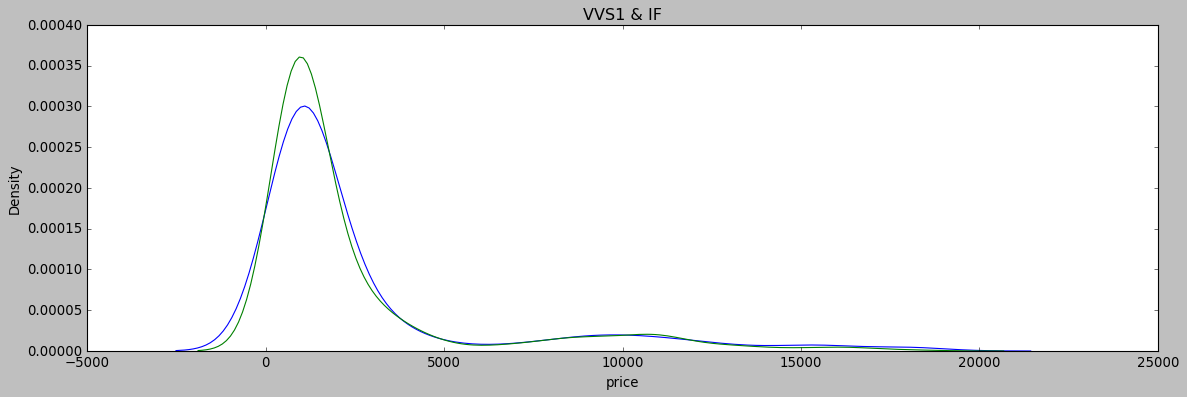

In [326]:
a = 1
plt.figure(figsize= (15,5))
IF = (df[df['clarity'] == 'IF'].price)
VVS1 = (df[df['clarity'] == 'VVS1'].price)
sns.kdeplot(IF)
sns.kdeplot(VVS1)
plt.tight_layout()
plt.title('VVS1 & IF')

Text(0.5, 1.0, 'VS1 & VS2')

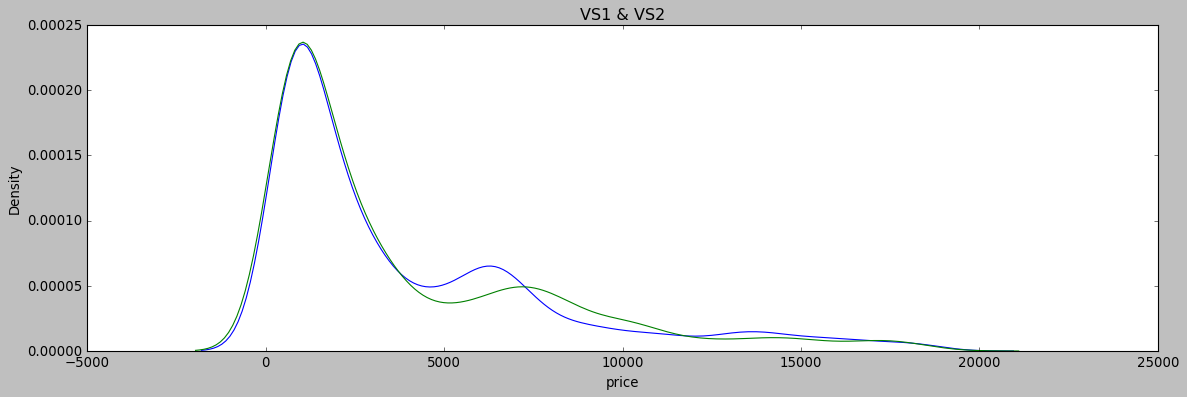

In [327]:
a = 1
plt.figure(figsize= (15,5))
VS2 = (df[df['clarity'] == 'VS2'].price)
VS1 = (df[df['clarity'] == 'VS1'].price)
sns.kdeplot(VS2)
sns.kdeplot(VS1)
plt.tight_layout()
plt.title('VS1 & VS2')

In [328]:
# Clarity increasing order IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
#new order of clarity will be VVS1,VVS2,VS1,SI1,SI2,I1

In [329]:
#VVS1 and IF have similar distribution consider mergining them
#VS1 and VS2 have similar distribution consider merging them
df.replace(to_replace='IF',value='VVS1', inplace= True)
df.replace(to_replace='VS2',value='VS1', inplace= True)

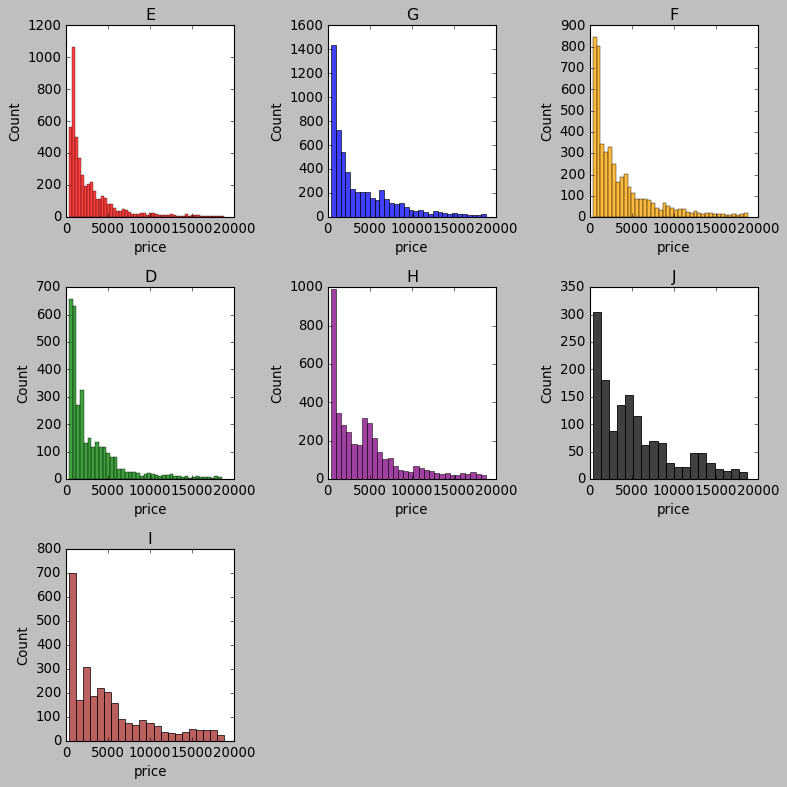

In [330]:
a = 1
plt.figure(figsize= (10,10))
for i in df.color.unique():
    plt.subplot(3,3,a)
    b = df[df['color'] == i].price
    c = [0,'red','blue','orange','green','purple','black','brown','pink']
    sns.histplot(b, color= c[a])
    plt.title(i)
    a = a + 1 
    plt.tight_layout()

Text(0.5, 1.0, 'F & G')

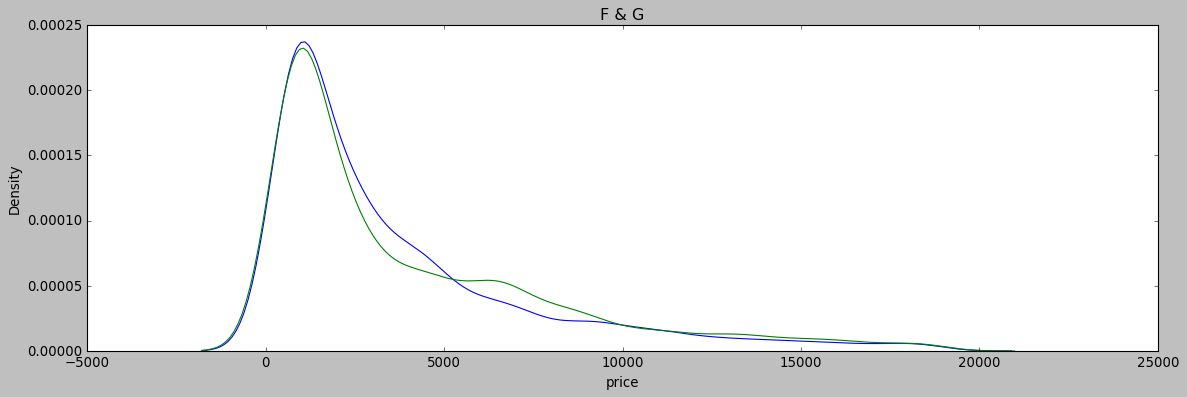

In [331]:
a = 1
plt.figure(figsize= (15,5))
f = (df[df['color'] == 'F'].price)
g = (df[df['color'] == 'G'].price)
sns.kdeplot(f)
sns.kdeplot(g)
plt.tight_layout()
plt.title('F & G')

Text(0.5, 1.0, 'D & E')

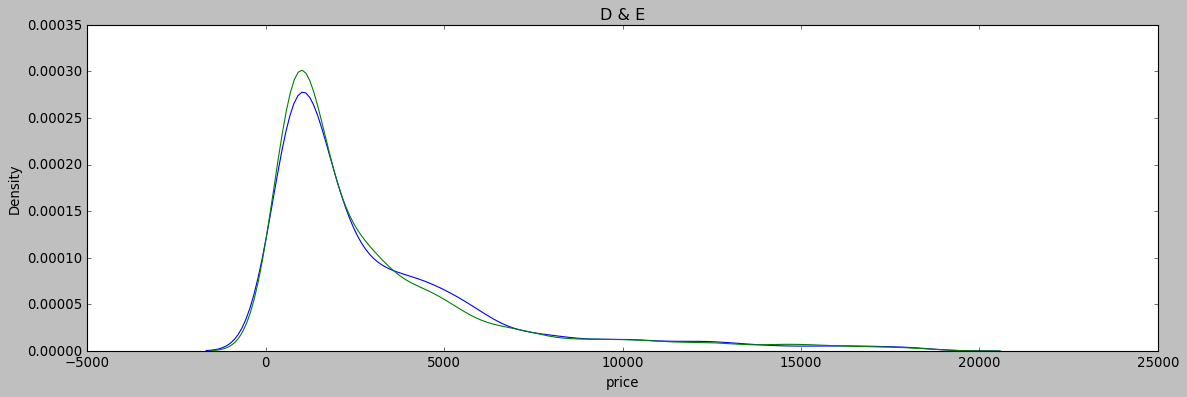

In [332]:
a = 1
plt.figure(figsize= (15,5))
d = (df[df['color'] == 'D'].price)
e = (df[df['color'] == 'E'].price)
sns.kdeplot(d)
sns.kdeplot(e)
plt.tight_layout()
plt.title('D & E')

In [333]:
# Color increasing order D,E,F,G,H,I,J
# new color increasing order E,F,H,I,J

In [334]:
#F and G have similar distribution consider merging them
#E and D have similar distribution consider merging them
df.replace(to_replace='G',value='F', inplace= True)
df.replace(to_replace='D',value='E', inplace= True)

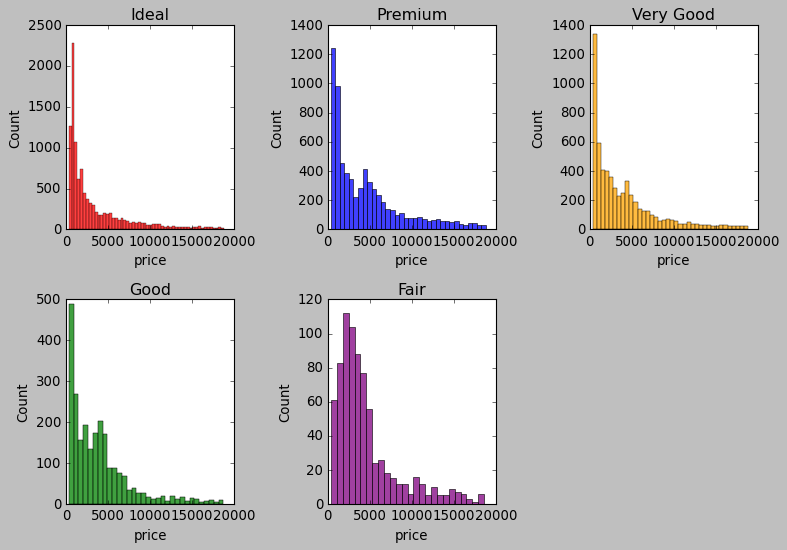

In [335]:
a = 1
plt.figure(figsize= (10,10))
for i in df.cut.unique():
    plt.subplot(3,3,a)
    b = df[df['cut'] == i].price
    c = [0,'red','blue','orange','green','purple','black','brown','pink']
    sns.histplot(b, color= c[a])
    plt.title(i)
    a = a + 1 
    plt.tight_layout()

Text(0.5, 1.0, 'Premium & Very Good')

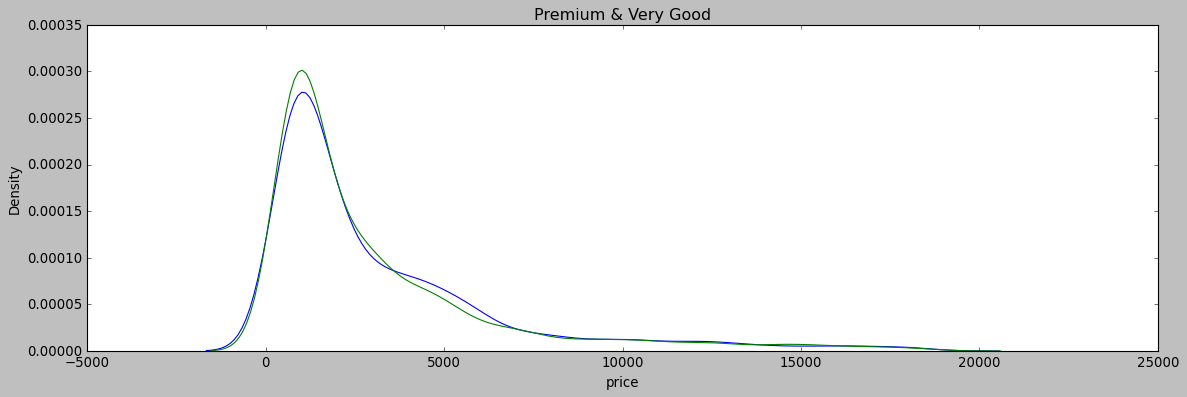

In [336]:
a = 1
plt.figure(figsize= (15,5))
Premium = (df[df['cut'] == 'Premium'].price)
VeryGood = (df[df['cut'] == 'Very Good'].price)
sns.kdeplot(d)
sns.kdeplot(e)
plt.tight_layout()
plt.title('Premium & Very Good')

In [337]:
# Cut increasing quality Fair,good,very good, premium, ideal
# new Cut quality increasing order Fair,good,Premium,ideal

In [338]:
#Very Good and Premium have similar distribution consider merging them
df.replace(to_replace='Very Good',value='Premium', inplace= True)

In [339]:
#new order of clarity will be VVS1,VVS2,VS1,SI1,SI2,I1
# new color increasing order E,F,H,I,J
# new Cut quality increasing order Fair,good,Premium,ideal

In [340]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print("PRICE MEDIAN", df.groupby([i])['price'].median())

PRICE MEDIAN cut
Fair       3337.0
Good       3092.5
Ideal      1762.0
Premium    2840.0
Name: price, dtype: float64
PRICE MEDIAN color
E    1750.0
F    2275.0
H    3394.0
I    3733.0
J    4234.5
Name: price, dtype: float64
PRICE MEDIAN clarity
I1      3494.0
SI1     2795.0
SI2     4077.0
VS1     2010.0
VVS1    1064.0
VVS2    1253.0
Name: price, dtype: float64


In [341]:
#new order of clarity will be VVS1,VVS2,VS1,SI1,SI2,I1
# new color increasing order E,F,H,I,J
# new Cut quality increasing order Fair,good,Premium,ideal

In [342]:
df.cut.replace(to_replace='Fair', value = '1',inplace= True)
df.cut.replace(to_replace='Good', value = '2',inplace= True)
df.cut.replace(to_replace='Premium', value = '3',inplace= True)
df.cut.replace(to_replace='Ideal', value = '4',inplace= True)

df.color.replace(to_replace ='E',value = '1',inplace = True)
df.color.replace(to_replace ='F',value = '2',inplace = True)
df.color.replace(to_replace ='H',value = '3',inplace = True)
df.color.replace(to_replace ='I',value = '4',inplace = True)
df.color.replace(to_replace ='J',value = '5',inplace = True)

df.clarity.replace(to_replace = 'VVS1',value= '1',inplace = True)
df.clarity.replace(to_replace = 'VVS2',value= '2',inplace = True)
df.clarity.replace(to_replace = 'VS1',value= '3',inplace = True)
df.clarity.replace(to_replace = 'SI1',value= '4',inplace = True)
df.clarity.replace(to_replace = 'SI2',value= '5',inplace = True)
df.clarity.replace(to_replace = 'I1',value= '6',inplace = True)

In [343]:
df.cut = df.cut.astype('int64')
df.color = df.color.astype('int64')
df.clarity = df.clarity.astype('int64')

<AxesSubplot:>

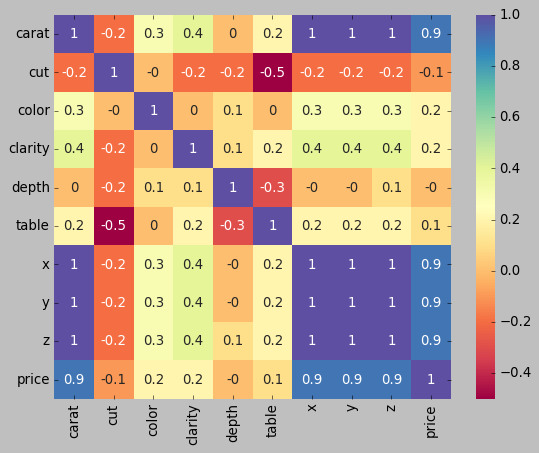

In [344]:
sns.heatmap(df.corr().round(1), annot = True, cmap= 'Spectral')

In [345]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,1,4,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,2,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,1,2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,2,3,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,2,1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,2,4,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,4,3,1,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,3,1,3,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,3,2,2,61.8,56.0,4.19,4.20,2.60,682


In [346]:
x = df.drop('price',axis =1)

y = df[['price']]

1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). 
Apply Linear regression using scikit learn. 
Perform checks for significant variables using appropriate method from statsmodel. 
Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. 
Compare these models and select the best one with appropriate reasoning

In [347]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
    test_size=0.30,
    random_state=1,
    stratify=None)

In [348]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [349]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 10888.605316305553
The coefficient for cut is 176.58307363595236
The coefficient for color is -504.42051493006613
The coefficient for clarity is -697.65648503925
The coefficient for depth is 91.06601880693076
The coefficient for table is -20.77917623732672
The coefficient for x is -1310.8072803222633
The coefficient for y is 2186.8333876849415
The coefficient for z is -2846.711865638548


In [350]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1267.736469758981


In [351]:
regression_model.coef_

array([[10888.60531631,   176.58307364,  -504.42051493,  -697.65648504,
           91.06601881,   -20.77917624, -1310.80728032,  2186.83338768,
        -2846.71186564]])

In [352]:
regression_model.score(x_train, y_train)

0.9097006609586051

In [353]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([x_train, y_train], axis=1)
data_train.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
2665,0.72,4,1,1,61.4,57.0,5.74,5.79,3.54,4864
7774,1.20,3,3,4,62.4,59.0,6.72,6.68,4.18,5592
9339,1.00,3,2,3,62.2,57.0,6.43,6.40,3.99,6296
1025,0.45,4,1,5,62.0,55.0,4.92,4.95,3.06,706
3558,1.10,3,2,3,62.8,58.0,6.60,6.58,4.14,6387


In [354]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    -1267.736470
carat        10888.605316
cut            176.583074
color         -504.420515
clarity       -697.656485
depth           91.066019
table          -20.779176
x            -1310.807280
y             2186.833388
z            -2846.711866
dtype: float64

In [355]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.108e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:19:25   Log-Likelihood:            -1.6044e+05
No. Observations:               18846   AIC:                         3.209e+05
Df Residuals:                   18836   BIC:                         3.210e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1267.7365   1263.764     -1.003      0.3

In [356]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(x_test)-y_test)**2)

In [357]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

1143.1602006446137

In [358]:
# so there is avg of 1143 (roundoff) price difference from real price on an avg

In [359]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(x_test, y_test)

0.920215576821993

In [360]:
# predict price for a set of attributes not in the training or test set
y_pred = regression_model.predict(x_test)

Text(0.5, 0, 'Actual price')

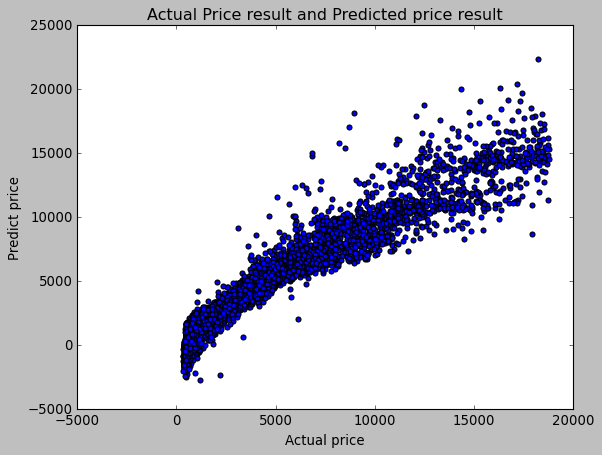

In [361]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['price'], y_pred);
plt.title('Actual Price result and Predicted price result');
plt.ylabel('Predict price')
plt.xlabel('Actual price')

In [362]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [363]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [392]:
from scipy.stats import zscore

x_train_scaled  = x_train.apply(zscore)
x_test_scaled = x_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [365]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# x_train_scaler.inverse_transform('X')scaled= scaler.fit_transform(x_train)
# x_test_scaled = scaler.fit_transform(x_test)
# y_train_scaled= scaler.fit_transform(y_train)
# y_test_scaled= scaler.fit_transform(y_test)

In [366]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [367]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2922344874413625
The coefficient for cut is 0.032252059167403965
The coefficient for color is -0.14286185464559725
The coefficient for clarity is -0.20889826542744508
The coefficient for depth is 0.03155590075959115
The coefficient for table is -0.01159500231611841
The coefficient for x is -0.36737120167886844
The coefficient for y is 0.6084135030070512
The coefficient for z is -0.49249081693423535


In [375]:
regression_model.coef_

array([[ 1.29223449,  0.03225206, -0.14286185, -0.20889827,  0.0315559 ,
        -0.011595  , -0.3673712 ,  0.6084135 , -0.49249082]])

In [376]:
# from sklearn.preprocessing import StandardScaler

# X =regression_model.coef_

# scaler.inverse_transform(X)

array([[9175.71049388, 4076.38740112, 3367.67718061, 3100.41869597,
        4073.56995179, 3898.93228099, 2459.05681244, 6408.19242459,
        1952.68043043]])

In [502]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -9.236810421346543e-17


In [503]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(x_test_scaled, y_test_scaled)

0.9201935438850604

In [504]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(x_test_scaled)-y_test_scaled)**2)

In [505]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.2825003648049673

In [506]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(x_test_scaled)

Text(0.5, 0, 'Actual price')

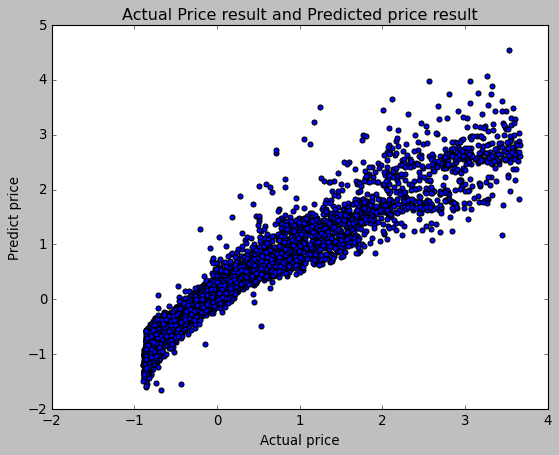

In [507]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['price'], y_pred)
plt.title('Actual Price result and Predicted price result');
plt.ylabel('Predict price')
plt.xlabel('Actual price')

In [508]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [509]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 

In [510]:
i=0
for column in x.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 92.07689851896768
cut ---> 29.235929139853262
color ---> 5.314126597077221
clarity ---> 10.745158345346487
depth ---> 1274.3947181764374
table ---> 897.3583914796992
x ---> 10698.742654262274
y ---> 9946.054063801412
z ---> 3940.4227938688696


# Create a regularized RIDGE model and note the coefficients

In [383]:
ridge = Ridge(alpha=0.3)
ridge.fit(x_train_scaled,y_train_scaled)
print ("Ridge model:", (ridge.coef_))
pd.DataFrame(ridge.coef_, columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])


Ridge model: [[ 1.29158538  0.0322718  -0.14284365 -0.20893032  0.03092589 -0.01161736
  -0.36349652  0.59985853 -0.48713762]]


,carat,cut,color,clarity,depth,table,x,y,z
0,1.291585,0.032272,-0.142844,-0.20893,0.030926,-0.011617,-0.363497,0.599859,-0.487138


In [384]:
x_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [385]:
ridge.fit(x_test_scaled,y_test_scaled)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 1.40854863  0.03888317 -0.14619886 -0.19520716 -0.00556492 -0.01054449
  -0.57858784  0.43215166 -0.21729136]]


In [514]:
y_pred_ridge = ridge.predict(x_test_scaled)

Text(0.5, 0, 'Actual price')

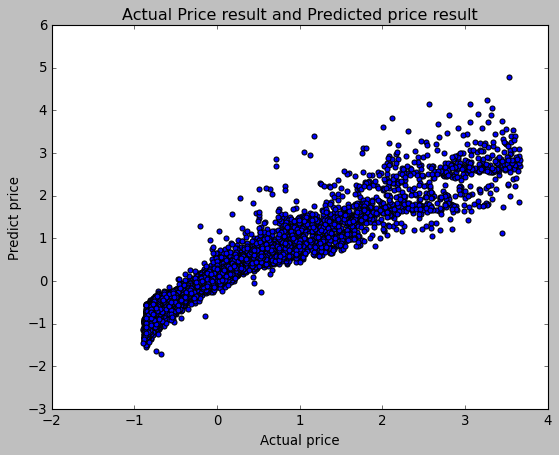

In [515]:
plt.scatter(y_test_scaled['price'], y_pred_ridge)
plt.title('Actual Price result and Predicted price result');
plt.ylabel('Predict price')
plt.xlabel('Actual price')

# Create a regularized LASSO model and note the coefficients

In [389]:
lasso = Lasso(alpha=0.3)
lasso.fit(x_train_scaled,y_train_scaled)
print ("Lasso model:", (lasso.coef_))
pd.DataFrame(lasso.coef_, index = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])
# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.6207471  0.        -0.        -0.        -0.         0.
  0.         0.         0.       ]


,0
carat,0.620747
cut,0.000000
color,-0.000000
clarity,-0.000000
depth,-0.000000
table,0.000000
x,0.000000
y,0.000000
z,0.000000


In [390]:
lasso.fit(x_test_scaled,y_test_scaled)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.62615401  0.         -0.         -0.         -0.          0.
  0.          0.          0.        ]


In [518]:
y_pred_lasso = lasso.predict(x_test_scaled)

Text(0.5, 0, 'Actual price')

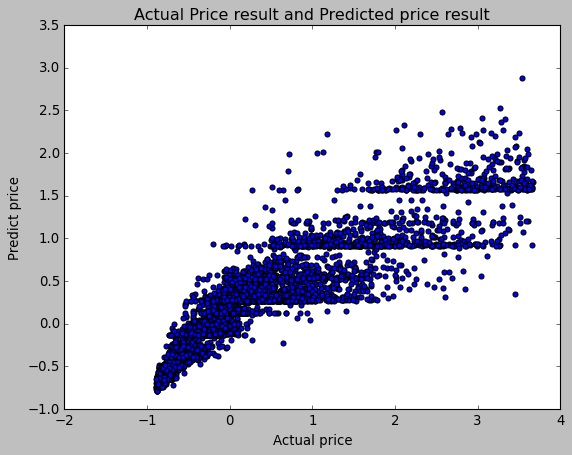

In [519]:
plt.scatter(y_test_scaled['price'], y_pred_lasso)
plt.title('Actual Price result and Predicted price result');
plt.ylabel('Predict price')
plt.xlabel('Actual price')

## Let us compare their scores

In [520]:
print(regression_model.score(x_train_scaled,y_train_scaled))
print(regression_model.score(x_test_scaled, y_test_scaled))

0.9097006609586051
0.9201935438850604


In [521]:
print(ridge.score(x_train_scaled,y_train_scaled))
print(ridge.score(x_test_scaled, y_test_scaled))

0.9088062206612371
0.9212903568270294


In [522]:
print(lasso.score(x_train_scaled,y_train_scaled))
print(lasso.score(x_test_scaled, y_test_scaled))

0.7609901324736402
0.7677612505582672


In [523]:
# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

SyntaxError: invalid syntax (Temp/ipykernel_6448/2409761396.py, line 1)